In [162]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from scripts.category_analysis import *
from scripts.clustering import *
import plotly.express as px

In [163]:
adapted_movies_df = pd.read_csv('adapted_movies.csv')
_, adapted_movies_df = analysis_by_category(adapted_movies_df)

In [14]:
all_movies_df = pd.read_csv('all_movies.csv')
_, all_movies_df = analysis_by_category(all_movies_df)

In [165]:
df_genre_adapted, adapted_movies_df = get_dummy(adapted_movies_df)
df_genre_all, all_movies_df = get_dummy(all_movies_df)

(2795, 53)

### clustering on adapted movies

,k,sse
0,2,2.098026e+06
1,3,1.312817e+06
2,4,9.166130e+05
3,5,8.485851e+05
4,6,6.124201e+05
5,7,4.738441e+05
6,8,4.063796e+05
7,9,3.724594e+05
8,10,3.242977e+05
9,11,2.761912e+05


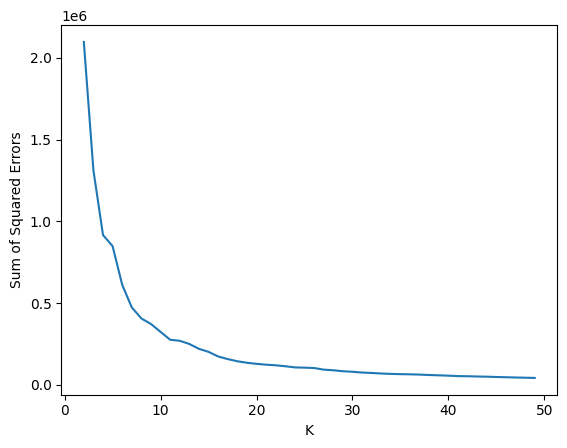

In [166]:
df = df_genre_adapted.drop(columns=['wikipedia_id' ])
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(df)
sse = plot_sse(X_reduced_tsne, start=2, end=50)

In [167]:
labels = pd.Series(KMeans(n_clusters=11, random_state=13).fit_predict(X_reduced_tsne))
genres = pd.Series(adapted_movies_df.groupby('wikipedia_id')['MovieGenre'].apply(lambda x: list(x)).reset_index(drop=True))

title = 'KMeans Clustering on t-SNE Reduced Data of Adapted Movies'

data = {
    'Dimension 1': X_reduced_tsne[:, 0],
    'Dimension 2': X_reduced_tsne[:, 1],
    'Label': labels,
    'MovieName': adapted_movies_df['MovieName'],
    'Genre': genres
}
df = pd.DataFrame(data)

plot_clustering(df, title)

In [168]:
labels = pd.Series(labels, name='Cluster')
genres = pd.Series(genres, name='Genres')
df = pd.concat([adapted_movies_df, labels, genres], axis = 1)
cluster_analysis = analysis_by_cluster(df)

### clustering on all movies

In [ ]:
df = df_genre_all.drop(columns=['wikipedia_id' ])
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(df)
sse = plot_sse(X_reduced_tsne, start=2, end=50)

labels = pd.Series(KMeans(n_clusters=11, random_state=13).fit_predict(X_reduced_tsne))
genres = pd.Series(adapted_movies_df.groupby('wikipedia_id')['MovieGenre'].apply(lambda x: list(x)).reset_index(drop=True))

title = 'KMeans Clustering on t-SNE Reduced Data of All Movies'

data = {
    'Dimension 1': X_reduced_tsne[:, 0],
    'Dimension 2': X_reduced_tsne[:, 1],
    'Label': labels,
    'MovieName': adapted_movies_df['MovieName'],
    'Genre': genres
}
df = pd.DataFrame(data)

plot_clustering(df, title)

In [ ]:
labels = pd.Series(labels, name='Cluster')
genres = pd.Series(genres, name='Genres')
df = pd.concat([adapted_movies_df, labels, genres], axis = 1)
cluster_analysis = analysis_by_cluster(df)